# Data Visualization

### Import

In [14]:
import kagglehub
import numpy as np

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database", path="diabetes.csv")

In [15]:
import pandas as pd

df = pd.read_csv(path)

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Preprocessing

<Axes: >

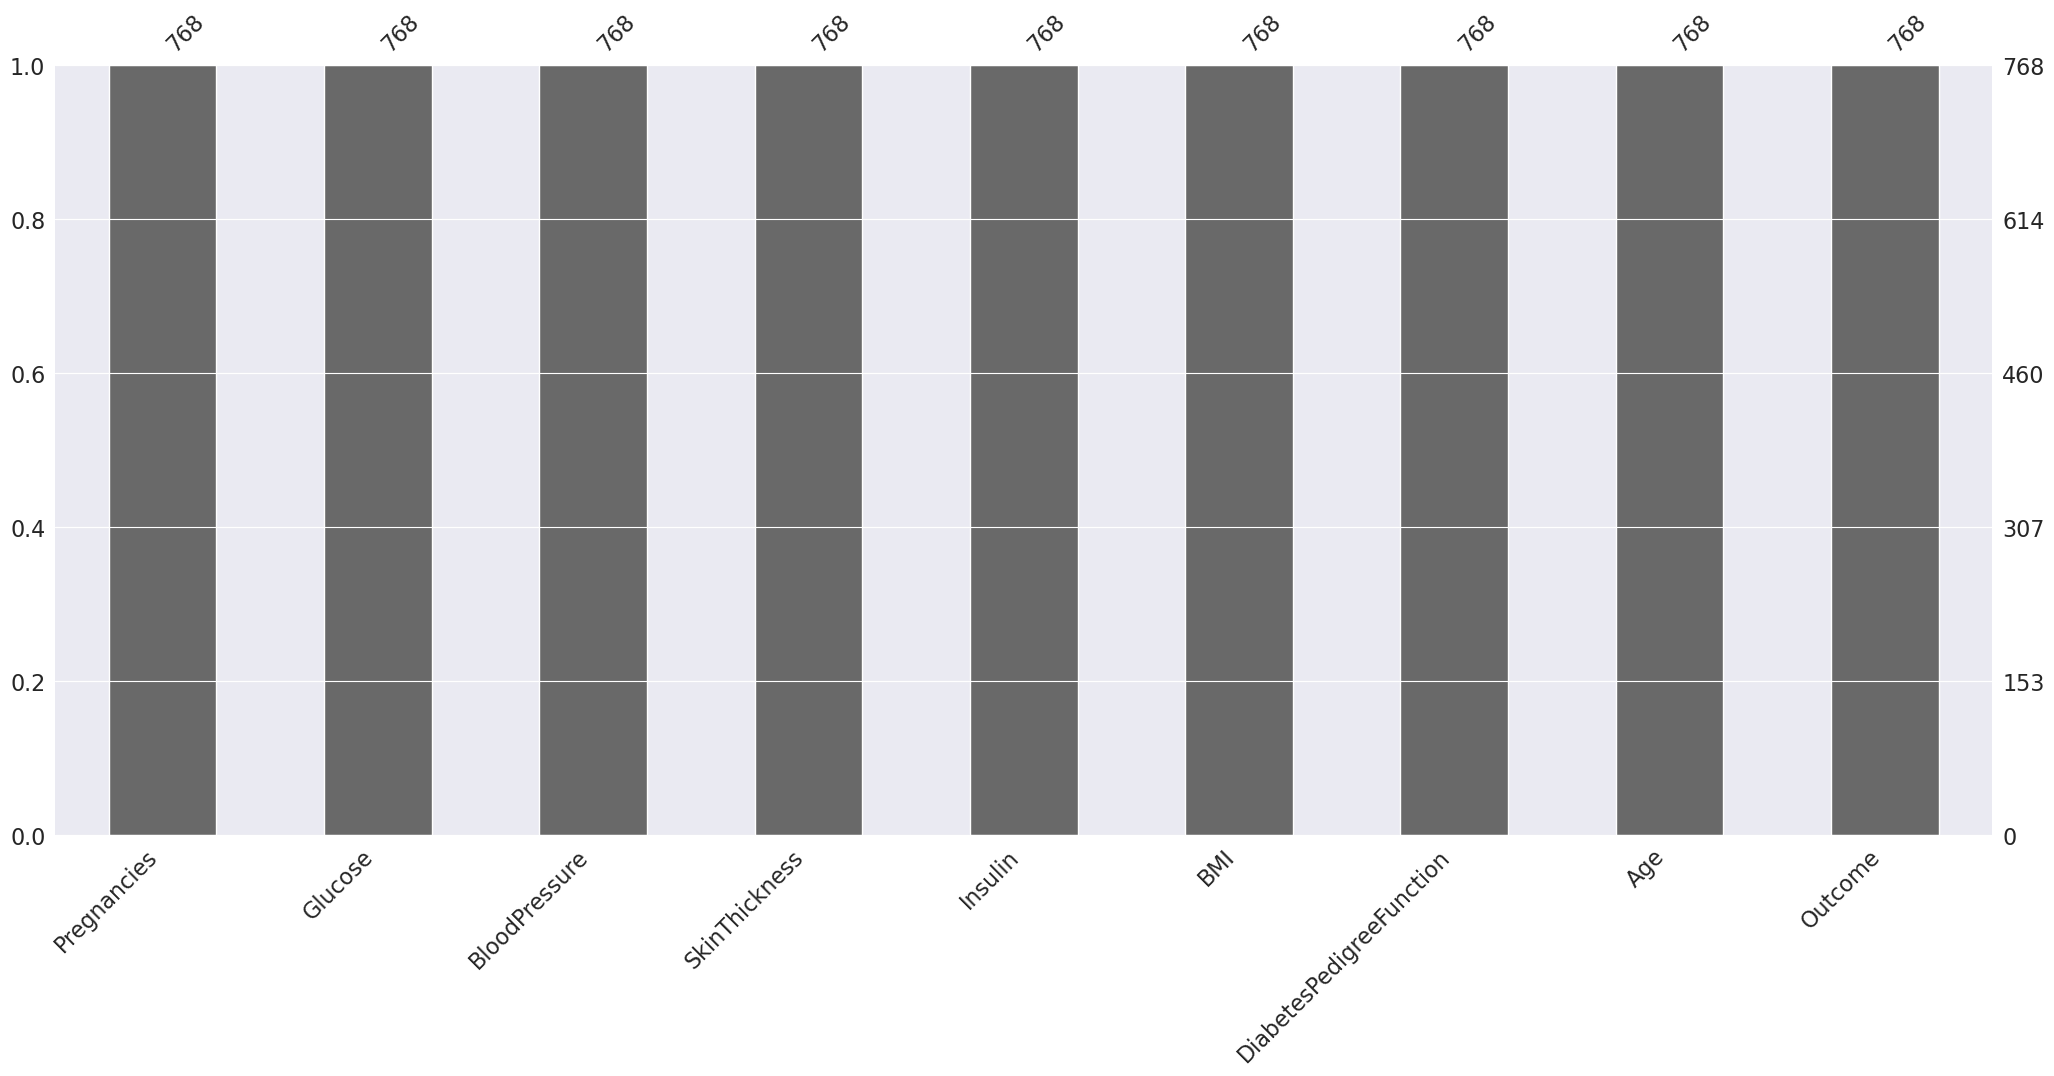

In [17]:
import missingno as msno
%matplotlib inline
msno.bar(df)

As we could have seen there aren't any missing datas. Also, we will not train anything that's why there isn't any meaning in applying any scaling. Also, all the values are in numeric format.

<Axes: >

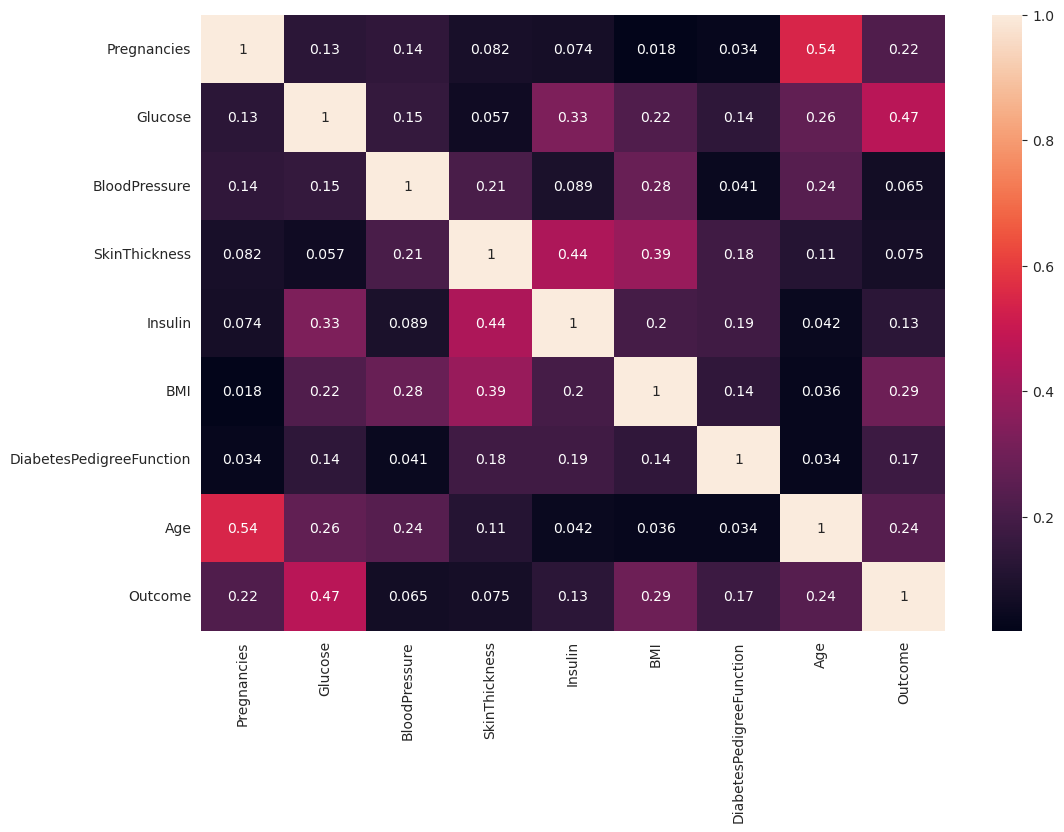

In [18]:
from matplotlib import pyplot as plt
import seaborn as  sns

plt.figure(figsize=(12, 8))
sns.heatmap(abs(df.corr()), annot=True)

## Repeats the plots that were presented in book.

I think that plots should be presented in depending on the needs and the type of data. There is way I will go through all the types of plots presented in the book and will try to find usages for current dataset.

### Error Bars
As explained in the handbook the error plot is used often when the measurement error is shown. In the dataset description there aren't any details of how the measurements where taken therefor I will try to assume some errors that where taken during the measurements.

I will take the Glucose measurements with the error of 5.6 mg/dL and on the x-axis the Insulin measurements.
  

<ErrorbarContainer object of 3 artists>

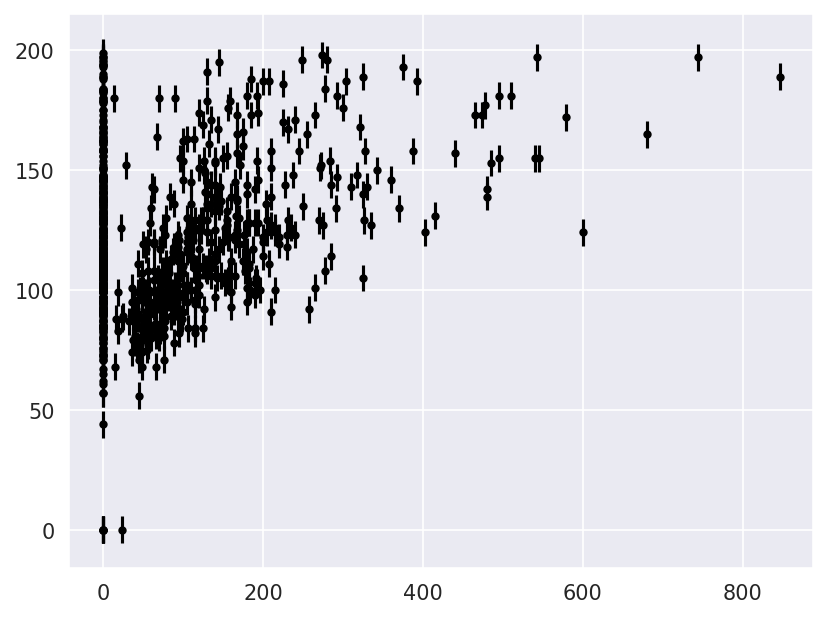

In [19]:
# temp = df.sort_values("Insulin")

plt.figure(dpi=150)
dy = 5.6
plt.errorbar(df["Insulin"], df["Glucose"], yerr=dy, fmt='.k')

I thought it will be more of a linear graph, but this serves good as well. 

The line that appeared at the Insulin could be the result of imputation of missing values with 0.

### Histogram

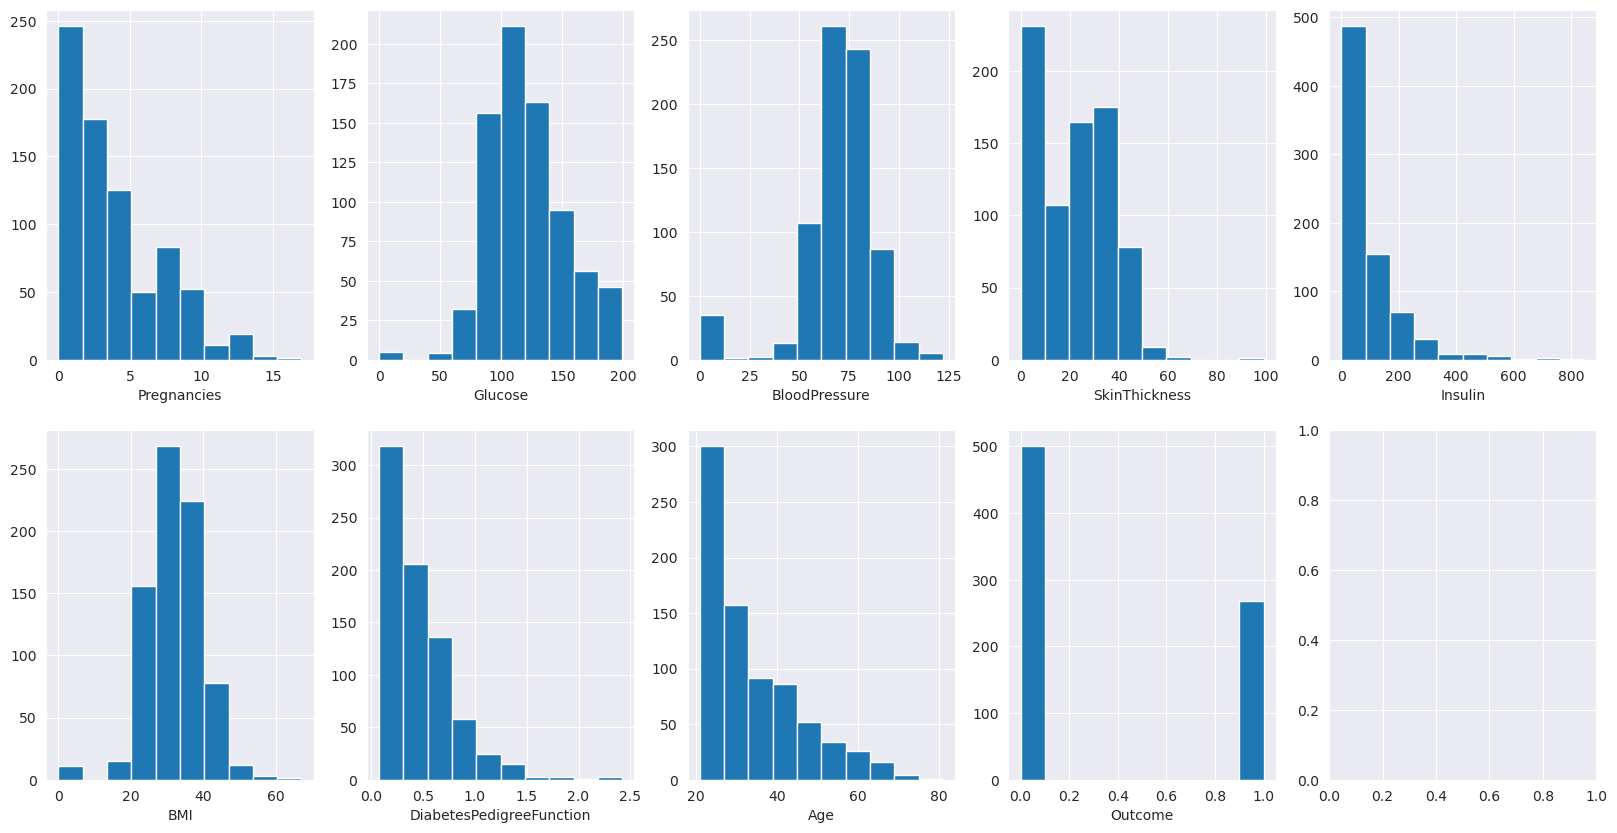

In [20]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, column in enumerate(df.columns):
    axs[i].hist(df[column])
    axs[i].set_xlabel(column)

Here we have the distribution of values across each feature. One thing that I observed is that there are a lot of datas are wrong, for example we could observe that SkinThickness has a big part of it in the 0 value which I think is wrong. Also, there is 0 BMI values and another one BloodPressure at 0.

### KDE Plots

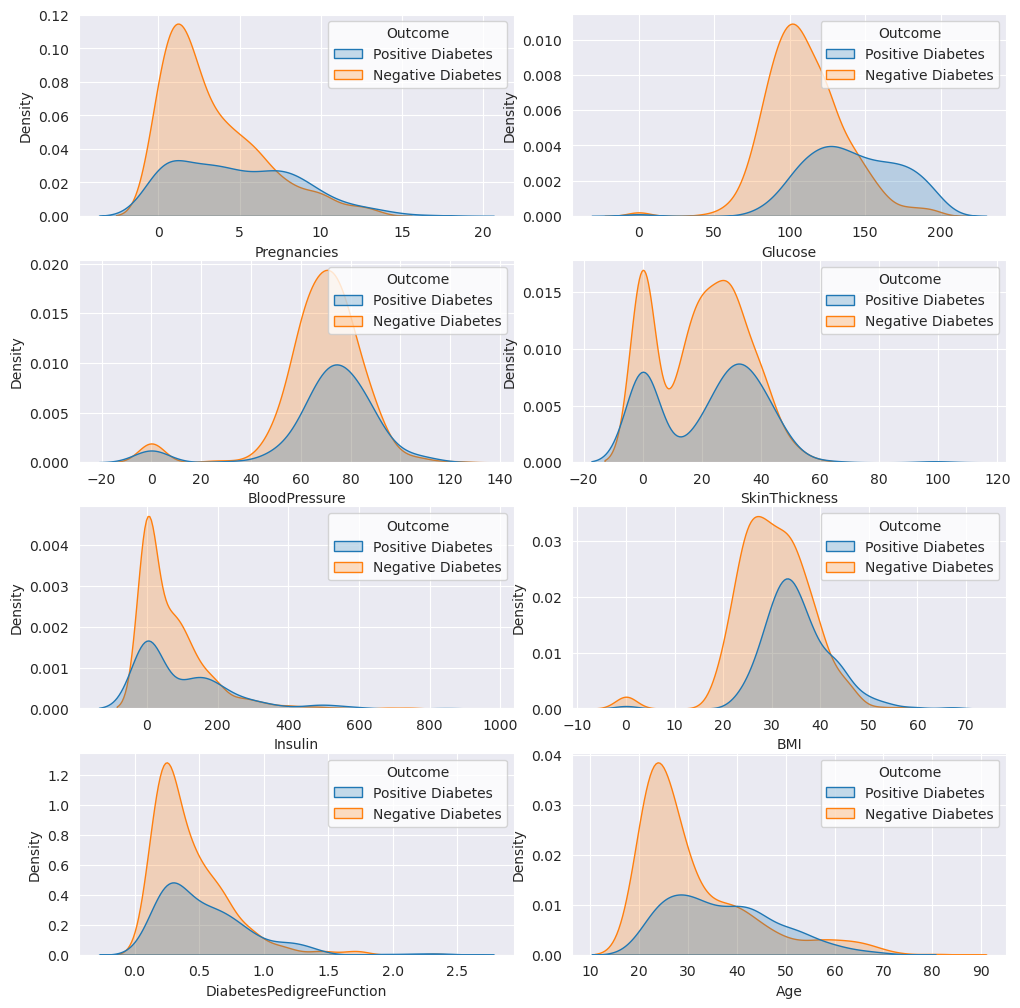

In [31]:
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
fig.tight_layout() # tight_layout() makes the layout.... less tight. hmmmm......

category = df.copy() 
category["Outcome"] = category["Outcome"].astype(str) # a warning raises if the 
category.loc[category["Outcome"] == "1", "Outcome"] = "Positive Diabetes"
category.loc[category["Outcome"] == "0", "Outcome"]  = "Negative Diabetes"

axes = axes.flatten()
with sns.axes_style("whitegrid"):
    for i, column in enumerate(category.columns[:-1]):
        sns.kdeplot(category, x=column , hue="Outcome", fill=True, ax = axes[i])

Here are the distribution of data across feature in dependence with the *Outcome*. Again from the correlation listed above the more the peaks are shifted from each other the greater the correlation is for this feature. 

### 3D KDE Plots

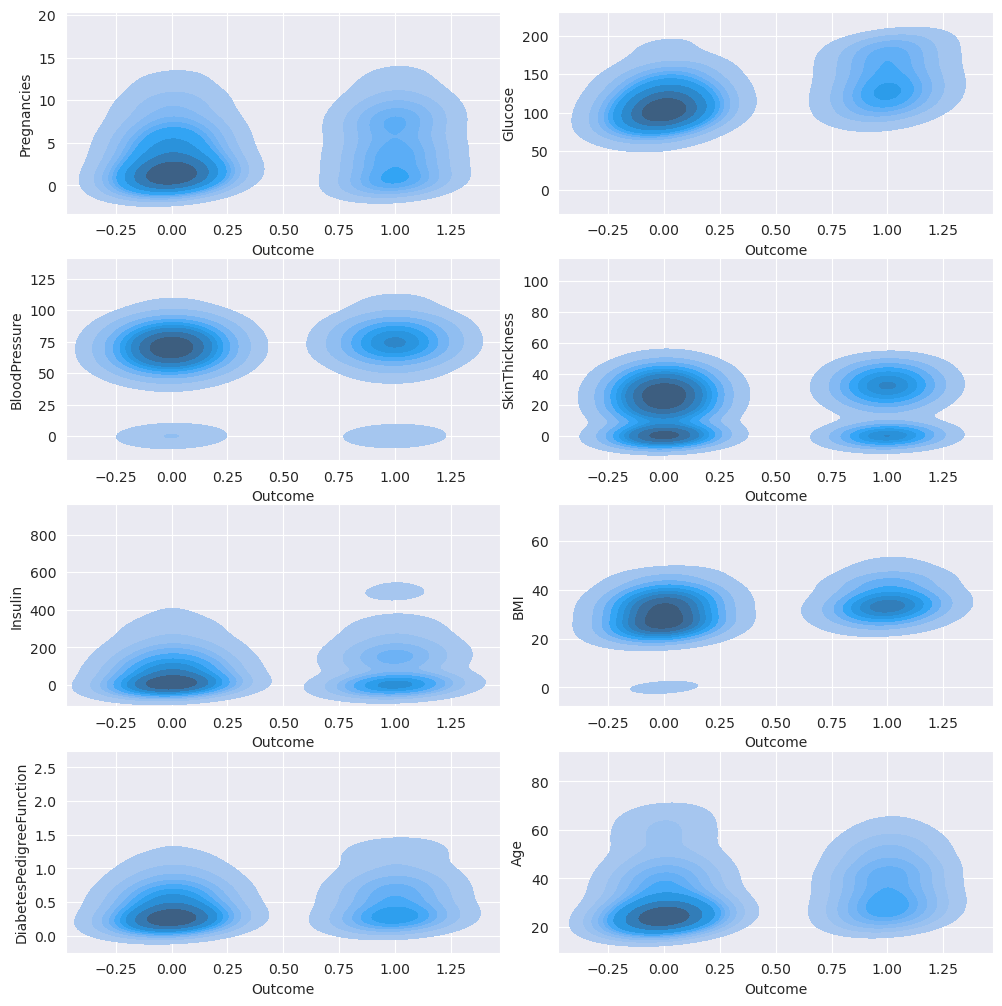

In [32]:
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
fig.tight_layout() # tight_layout() makes the layout.... less tight. hmmmm......

axes = axes.flatten()
with sns.axes_style('darkgrid'):
    for i, column in enumerate(df.columns[:-1]):
        sns.kdeplot(df, x="Outcome", y=column, fill=True, ax=axes[i])

To be honest I don't see anything useful here. Probably this type of graph will be more useful if the problem would be an regression problem with more than two values.

### Lmplot

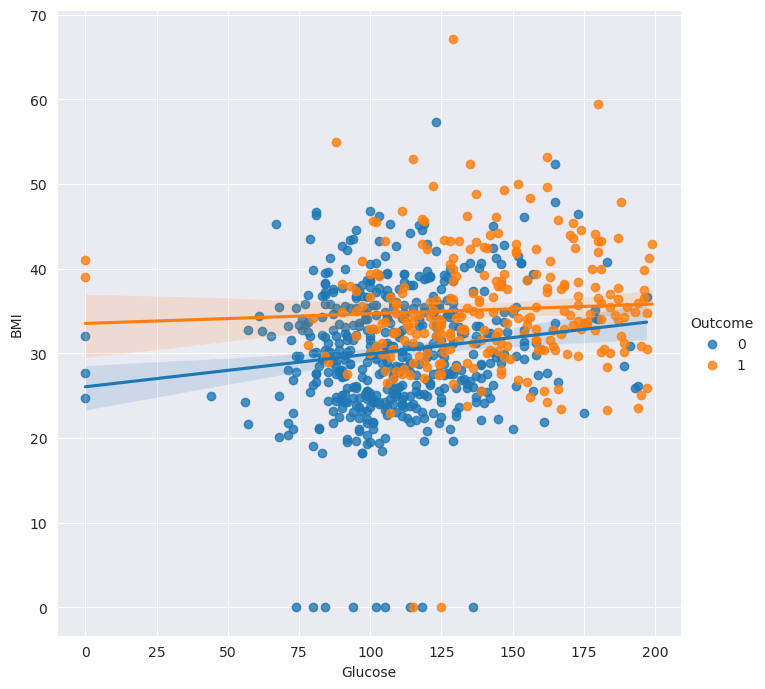

In [23]:
sns.lmplot(data=df, x='Glucose', y='BMI', hue='Outcome', height=7, aspect=1)

Here is represented the Glucose and BMI (two features with the highest correlation) dependence and the regression model. Could be observed that the points are very shuffled there aren't well-defined clusters which will mean that after training model we will get a very low accuracy. Even from the regression model given we could see that there are values that are contained by the opposite prediction. (the lines and there margins)

### Box Plot

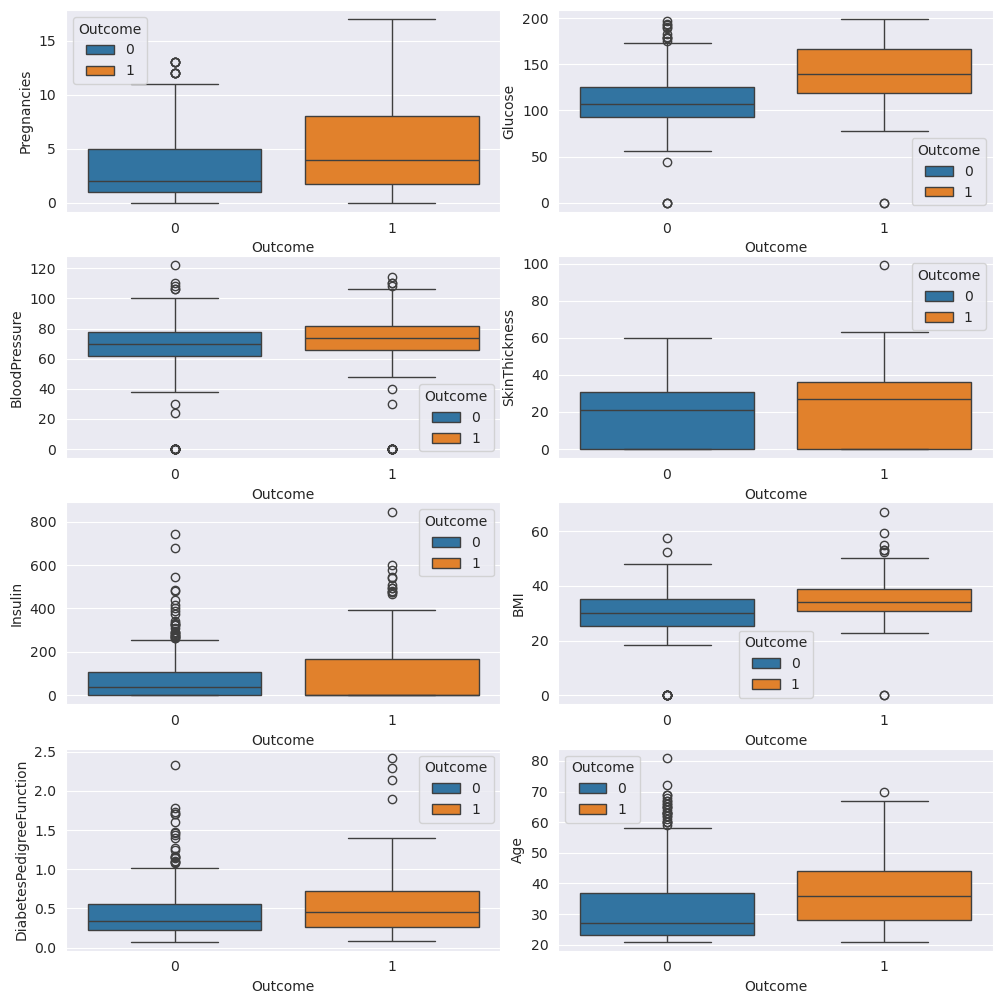

In [33]:
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
fig.tight_layout() 
axes = axes.flatten()
with sns.axes_style('darkgrid'):
    for i, column in enumerate(df.columns[:-1]):
        sns.boxplot(x='Outcome', y=column, data=df, hue="Outcome", ax=axes[i])

Here is represented the distribution of features in dependence with the *Outcome*. This plots is very similar to the KDE plots from above and again the same observation. The more the shift between the boxes the greater the correlation is.   

### Violinplot

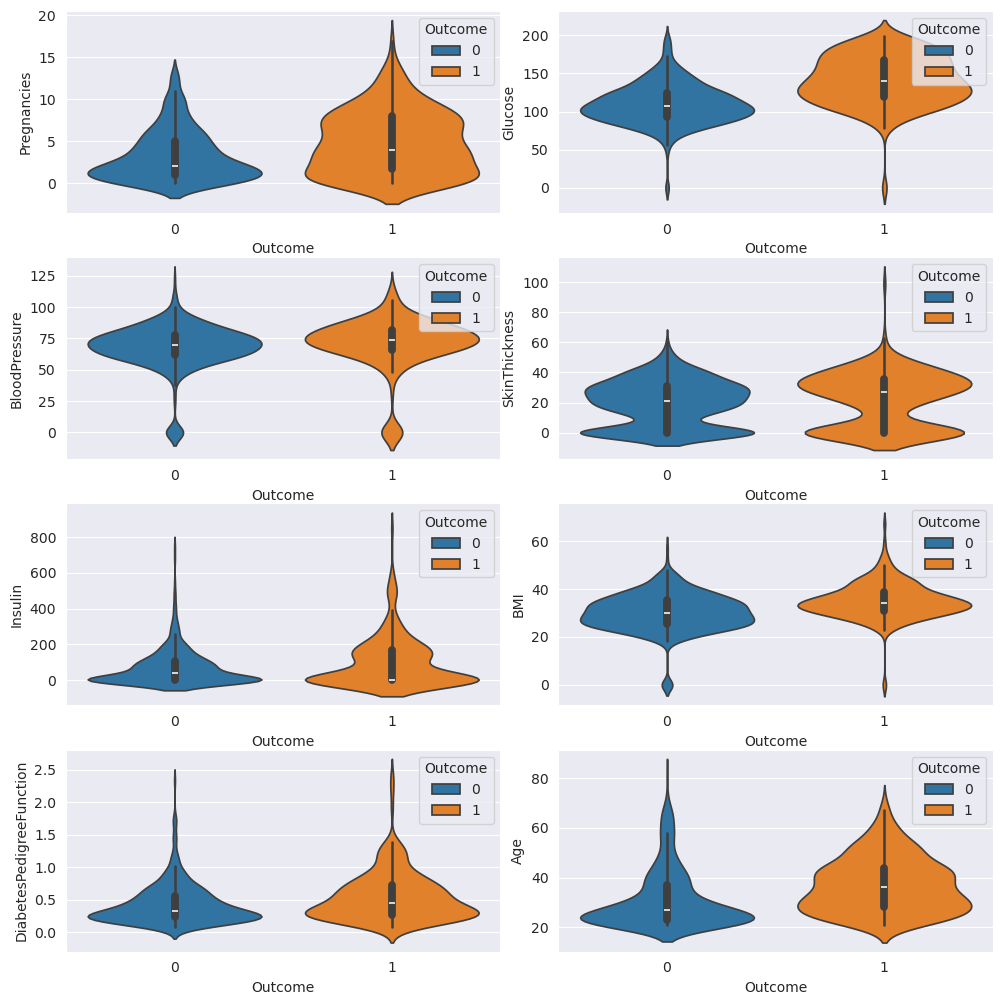

In [35]:
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
fig.tight_layout() 
axes = axes.flatten()
with sns.axes_style('darkgrid'):
    for i, column in enumerate(df.columns[:-1]):
        sns.violinplot(x='Outcome', y=column, data=df, hue="Outcome", ax=axes[i])

Here is the distribution of quantitative data across the *Outcome*. Again same observations the more shifted the more correlated it is. Also, this type of plots gives us the possibility to see the density.

### Conclusion
There are multiple ways of visualizing data, although they mostly give us the same results but some with more visual complexity than others, therefor when using any method described above should be taken in consideration the data for a simpler representation and understanding. Also, seaborn a gret tool, that simplifies a lot the work. This notebook will be used as reference for my future for works.  